In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

from utils.data_generation import generate_vectors, generate_scalars
from benchmark_functions.sphere import sphere_func

# Generating data

In [2]:
np.random.seed(1000)

In [3]:
# data configuration
input_dimention = 1
domain = [-5, 5]

data_set_size = 1_000

# noise configuration
noise_mean = 0
noise_std_deviation = 1.5

In [4]:
data_set_vectors = generate_vectors(input_dimention, domain, data_set_size)
data_set_scalars = generate_scalars(data_set_vectors, sphere_func)

noise = np.random.normal(noise_mean, noise_std_deviation, data_set_size)
noisy_scalars = data_set_scalars + noise

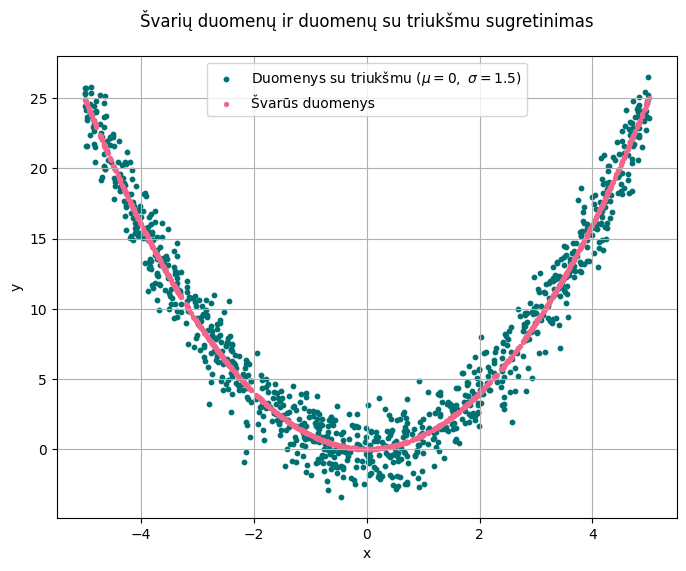

In [5]:
plt.figure(figsize = (8, 6))

plt.scatter(
    data_set_vectors, 
    noisy_scalars, 
    s = 10, 
    c = "#007172",
    label = rf"Duomenys su triukšmu ($\mu = {noise_mean},\ \sigma = {noise_std_deviation}$)"
)

plt.scatter(
    data_set_vectors, 
    data_set_scalars, 
    s = 8, 
    c = "#F2668B", 
    label = "Švarūs duomenys"
)

plt.title(f"Švarių duomenų ir duomenų su triukšmu sugretinimas\n")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

plt.show()